In [1]:
from shapely.geometry import Point, LineString

In [2]:
sample_in_1 = 'R1000,U564,L752,D449,R783,D938,L106,U130,R452,U462,R861,U654,L532,D485,R761,U336,L648,U671,L618,U429,R122,D183,L395,U662,R900,U644,L168,D778,L268,U896,L691,D852,L987,U462,R346,U103,R688,U926,R374,D543,R688,D682,R992,D140,L379,D245,L423,D504,R957,U937,L67,D560,L962,U275,R688,D617,L778,U581,R672,D402,R3,U251,R593,U897,L866,U189,L8,D5,R761,U546,R594,D880,L318,U410,L325,U564,L889,U688,L472,D146,R317,D314,L229,U259,R449,D630,L431,U4,R328,D727,R298,D558,R81,D508,L160,U113,L994,U263,L193,D631,R881,D608,L924,U447,R231,U885,L157,D739,R656,D121,R704,U437,L710,D207,R150,U406,R816,U683,R496,D715,L899,U757,L579,D684,L85,D354,R198,D411,R818,U772,L910,U493,R38,D130,L955,U741,R744,D224,L485,U201,L903,D904,R748,U288,R34,U673,R503,D931,L190,U547,L83,D341,R459,U114,L758,U220,L506,U444,L472,D941,L68,D910,R415,U668,L957,U709,R817,U116,R699,D424,R548,D285,R347,U396,R791,U62,L785,D360,L628,U415,L568,D429,R154,D840,L865,U181,L106,D564,L452,U156,L967,D421,R41,U500,L316,D747,R585,D858,L809,U402,L484,U752,R319,D563,R273,U84,R53,U874,L849,U90,R194,D969,R907,D625,L298,D984,R744,U172,R537,D177,L14,D921,L156,U133,R429,D787,R688,U894,L154,U192,R663,D225,L781,U426,R623,D60,L723,D995,R814,D195,L951,D594,R994,D543,L893,U781,R899,U85,R270,U303,R256,U977,R894,U948,R270,D301,L874,D388,R290,U986,L660,D741,L25,U381,R814,D150,R578,D529,R550,D176,R221,D653,R529,U83,R351,D462,R492,U338,R611,D5,L137,D547,R305,U356,R83,D880,R522,U681,R353,D54,R910,U774,L462,U48,L511,U750,R98,U455,R585,D579,L594'
sample_in_2 = 'L1003,U936,R846,U549,L824,D684,R944,U902,R177,U875,L425,U631,L301,U515,L790,D233,R49,U408,L184,D103,R693,D307,L557,D771,L482,D502,R759,D390,L378,U982,L430,U337,L970,U400,R829,U212,L92,D670,R741,D566,L797,U477,L377,U837,R19,U849,L21,D870,L182,U414,L586,U768,L637,U135,R997,U405,L331,D256,L22,D46,L504,D660,L757,U676,L360,D499,R180,D723,L236,U78,R218,U523,L71,D60,L485,U503,L352,D969,R747,U831,L285,D859,L245,D517,L140,U463,L895,U284,L546,U342,R349,D438,R816,U21,L188,U482,L687,D903,L234,U15,L758,D294,R789,D444,L498,D436,L240,D956,L666,U686,R978,D827,R919,U108,R975,D35,R475,U59,L374,U24,L26,D497,R454,D388,R180,D561,R80,D433,R439,D818,R962,D912,R247,U972,R948,D807,R867,D946,R725,U395,R706,U187,L17,U332,L862,D660,L70,U608,R223,D506,R592,U357,R520,D149,L572,D800,L570,D358,R648,U174,R520,U153,L807,U92,R840,U560,L938,D599,R972,D539,R385,D495,L26,D894,L907,D103,L494,U51,L803,D620,L68,D226,R947,U210,R864,D755,L681,D520,L867,D577,R378,D741,L91,D294,L289,D531,L301,U638,L496,U83,L278,D327,R351,D697,L593,U331,R91,D967,R419,D327,R78,U304,R462,D2,L656,D700,L27,D29,L598,U741,L349,D957,R161,U688,R326,D798,L263,U45,L883,U982,R116,D835,L878,U253,L232,D732,R639,D408,R997,D867,R726,D258,L65,D600,L315,U783,L761,U606,R67,D949,L475,U542,L231,U279,L950,U649,L670,D870,L264,U958,R748,D365,R252,D129,R754,U27,R571,D690,L671,U143,L750,U303,L412,U24,L443,D550,R826,U699,L558,U543,L881,D204,R248,D192,R813,U316,L76,D78,R523,U716,L422,D793,R684,D175,L347,D466,L219,D140,L803,U433,R96'

In [3]:
def input_string_to_LineString(input_string):
    """
    Parse the input string into (x,y) coordinates, assuming starting at (0,0)
    This is super inelegant*** sorry mike*** but whatever I'm in a hurry
    """
    split = [x for x in input_string.split(',')]
    coords = [(0,0)]
    for x in split:
        x_add = 'R' in x
        x_sub = 'L' in x
        y_add = 'U' in x
        y_sub = 'D' in x
    
        if x_add: coords.append( (coords[-1][0] + int(x[1:]), coords[-1][1]) )
        elif x_sub: coords.append( (coords[-1][0] - int(x[1:]), coords[-1][1]) )
        elif y_add: coords.append( (coords[-1][0], coords[-1][1] + int(x[1:])) )
        elif y_sub: coords.append( (coords[-1][0], coords[-1][1] - int(x[1:])) )
        else: print('wtf')
            
    points = [ Point(x) for x in coords ]
    
    return LineString(points)

In [4]:
def get_all_intersection_coords(line1,line2):
    """
    Given two lines, return all (int-casted) intersection points
    """
    itxns = line1.intersection(line2)
    
    return [ (int(x.xy[0][0]), int(x.xy[1][0])) for x in itxns ]

In [5]:
def manhattan_dist(coord):
    # assuming from (0,0) starting point
    return abs(coord[0]) + abs(coord[1])

In [6]:
def get_answer(linestring1, linestring2):
    """
    Main wrapper calling all utility functions in order.
    """
    line1 = input_string_to_LineString(linestring1)
    line2 = input_string_to_LineString(linestring2)
    itxn_coords = get_all_intersection_coords(line1, line2)
    # (0,0) doesn't count
    itxn_coords = [ x for x in itxn_coords if x != (0,0) ]
    man_dists = [ manhattan_dist(x) for x in itxn_coords ]
    
    return min(man_dists)

In [7]:
get_answer(sample_in_1, sample_in_2)

1064

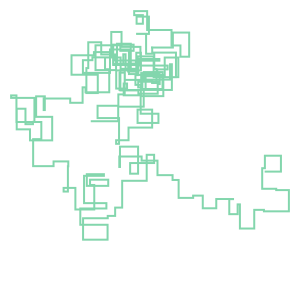

In [9]:
# Visualization of the actual lines, for fun
input_string_to_LineString(sample_in_1)

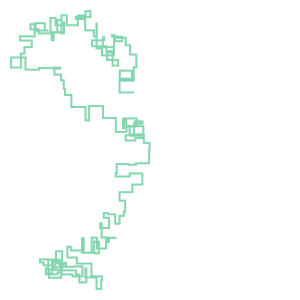

In [10]:
input_string_to_LineString(sample_in_2)